In [1]:
#1_IMPORTO LIBRERIAS
import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#2_UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO FRACTURA DE CADERA AÑOS 2022, 2023, 2024 Y 2025

# URLs de los archivos
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_fractura_de_cadera_2025.csv'

urls = [url, url1, url2, url3]

# Leer y concatenar los archivos a un único dataframe
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Mostar primerras filas e info del df combinado
display(df.head())
display(df.info())

Fecha de ingreso        Fecha de alta  \
0  01/01/2022 13:57:00  31/01/2022 21:13:00   
1  01/01/2022 14:04:00  05/01/2022 14:43:00   
2  01/01/2022 15:37:00  11/01/2022 06:15:00   
3  01/01/2022 17:57:00  05/01/2022 17:35:00   
4  01/01/2022 21:07:00  10/01/2022 13:58:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
1                                   Sábado   
2                                   Sábado   
3                                   Sábado   
4                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                 Lunes       Z.B.S. José Luis Santamaría   
1                             Miércoles               Z.B.S. Zamora Norte   
2                                Martes     Z.B.S. Villamuriel de Cerrato   
3                             Miércoles             Z.B.S. Periurbana Sur   
4                                 Lunes                     Z.B.S. Bierzo   

  Ámbito de procedencia          Hospital       Área  Provincia  Edad    Sexo  
0                Urbano     C.A.U. Burgos     Burgos     Burgos    92  Hombre  
1                 Rural       C.A. Zamora     Zamora     Zamora    88   Mujer  
2                Urbano   C.A.U. Palencia   Palencia   Palencia    92   Mujer  
3                 Rural  C.A.U. Salamanca  Salamanca  Salamanca    85   Mujer  
4                Urbano      H. El Bierzo     Bierzo       León    82   Mujer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9121 entries, 0 to 9120
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          9121 non-null   object
 1   Fecha de alta                             9121 non-null   object
 2   Día de la semana en la fecha del ingreso  9121 non-null   object
 3   Día de la semana en la fecha del alta     9121 non-null   object
 4   Zona Básica de Salud del Paciente         9118 non-null   object
 5   Ámbito de procedencia                     9118 non-null   object
 6   Hospital                                  9121 non-null   object
 7   Área                                      9121 non-null   object
 8   Provincia                                 9121 non-null   object
 9   Edad                                      9121 non-null   int64 
 10  Sexo                                      9121 n

None

In [3]:
# 3_CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

In [4]:
# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('altas_hospitalarias_con_diagnostico_de_fractura_de_cadera.csv', index=False)

In [5]:
# 4_AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_hosp_cad'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

In [6]:
# 5_ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_hosp_cad'] = pd.to_datetime(expanded_df['fecha_hosp_cad'])

In [7]:
# 6_PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

Fecha de ingreso       Fecha de alta  \
0 2022-01-01 13:57:00 2022-01-31 21:13:00   
0 2022-01-01 13:57:00 2022-01-31 21:13:00   
0 2022-01-01 13:57:00 2022-01-31 21:13:00   
0 2022-01-01 13:57:00 2022-01-31 21:13:00   
0 2022-01-01 13:57:00 2022-01-31 21:13:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                 Lunes       Z.B.S. José Luis Santamaría   
0                                 Lunes       Z.B.S. José Luis Santamaría   
0                                 Lunes       Z.B.S. José Luis Santamaría   
0                                 Lunes       Z.B.S. José Luis Santamaría   
0                                 Lunes       Z.B.S. José Luis Santamaría   

  Ámbito de procedencia       Hospital    Área Provincia  Edad    Sexo  \
0                Urbano  C.A.U. Burgos  Burgos    Burgos    92  Hombre   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    92  Hombre   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    92  Hombre   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    92  Hombre   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    92  Hombre   

  fecha_hosp_cad  
0     2022-01-01  
0     2022-01-02  
0     2022-01-03  
0     2022-01-04  
0     2022-01-05

Fecha de ingreso       Fecha de alta  \
9120 2024-12-31 20:57:00 2025-01-14 13:50:00   
9120 2024-12-31 20:57:00 2025-01-14 13:50:00   
9120 2024-12-31 20:57:00 2025-01-14 13:50:00   
9120 2024-12-31 20:57:00 2025-01-14 13:50:00   
9120 2024-12-31 20:57:00 2025-01-14 13:50:00   

     Día de la semana en la fecha del ingreso  \
9120                                   Martes   
9120                                   Martes   
9120                                   Martes   
9120                                   Martes   
9120                                   Martes   

     Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
9120                                Martes                  Z.B.S. Cacabelos   
9120                                Martes                  Z.B.S. Cacabelos   
9120                                Martes                  Z.B.S. Cacabelos   
9120                                Martes                  Z.B.S. Cacabelos   
9120                                Martes                  Z.B.S. Cacabelos   

     Ámbito de procedencia      Hospital    Área Provincia  Edad    Sexo  \
9120                 Rural  H. El Bierzo  Bierzo      León    92  Hombre   
9120                 Rural  H. El Bierzo  Bierzo      León    92  Hombre   
9120                 Rural  H. El Bierzo  Bierzo      León    92  Hombre   
9120                 Rural  H. El Bierzo  Bierzo      León    92  Hombre   
9120                 Rural  H. El Bierzo  Bierzo      León    92  Hombre   

     fecha_hosp_cad  
9120     2025-01-10  
9120     2025-01-11  
9120     2025-01-12  
9120     2025-01-13  
9120     2025-01-14

<class 'pandas.core.frame.DataFrame'>
Index: 91993 entries, 0 to 9120
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Fecha de ingreso                          91993 non-null  datetime64[ns]
 1   Fecha de alta                             91993 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  91993 non-null  object        
 3   Día de la semana en la fecha del alta     91993 non-null  object        
 4   Zona Básica de Salud del Paciente         91958 non-null  object        
 5   Ámbito de procedencia                     91958 non-null  object        
 6   Hospital                                  91993 non-null  object        
 7   Área                                      91993 non-null  object        
 8   Provincia                                 91993 non-null  object        
 9   Edad                              

None

In [8]:
#7 TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria_cadera = expanded_df.groupby(['fecha_hosp_cad', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria_cadera.head()

fecha_hosp_cad       Hospital  Occupancy
0     2021-10-28  C.A.U. Burgos          1
1     2021-10-29  C.A.U. Burgos          1
2     2021-10-30  C.A.U. Burgos          1
3     2021-10-31  C.A.U. Burgos          1
4     2021-11-01  C.A.U. Burgos          1

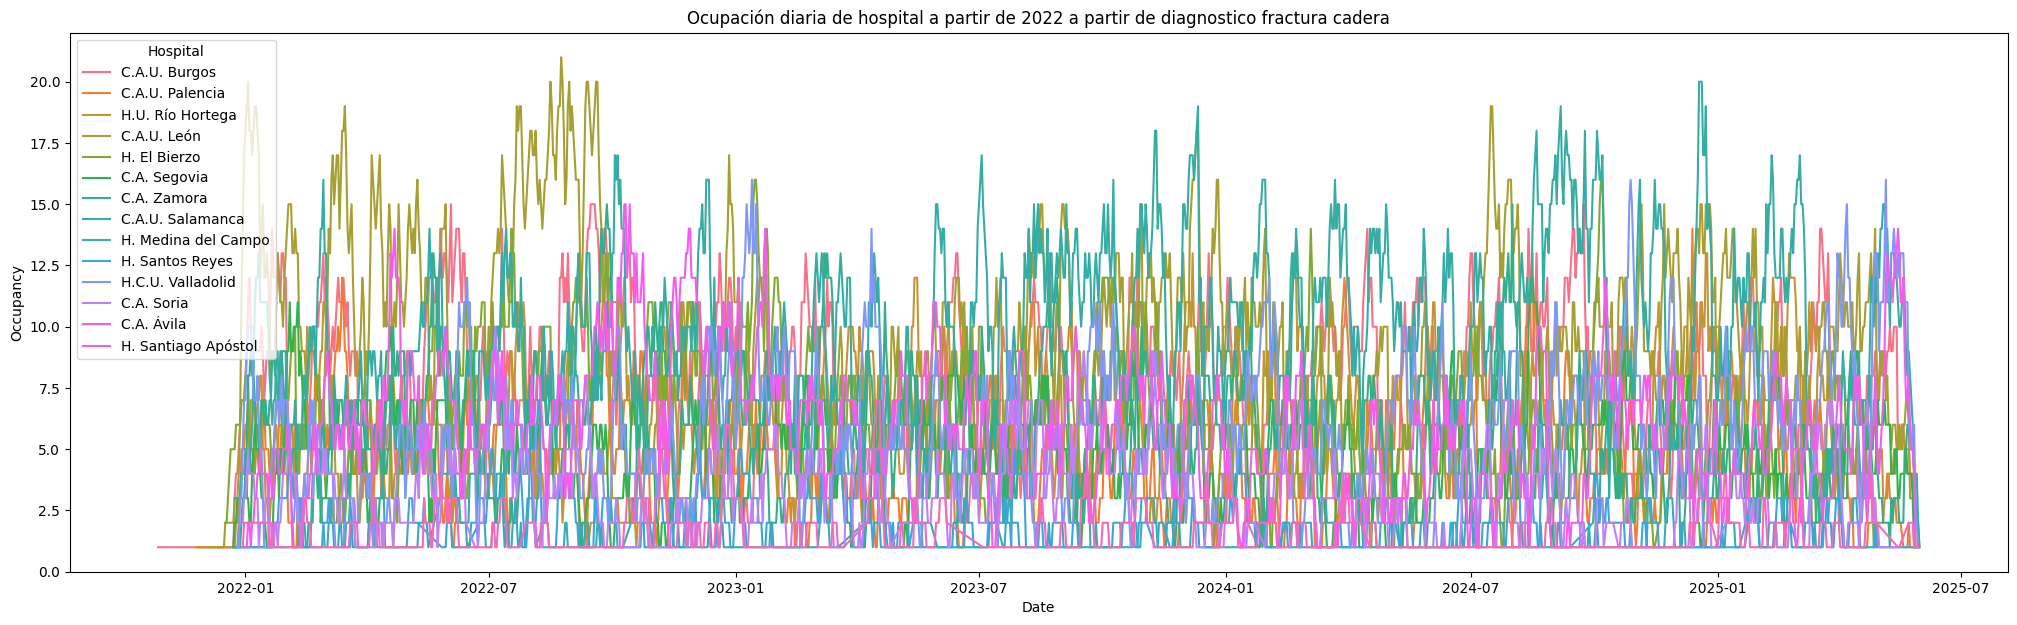

In [9]:
#7_VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria_cadera, x='fecha_hosp_cad', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico fractura cadera')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

In [10]:
#8 GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria_cadera.to_csv('Ocupación_total_diaria hospitales por fractura de cadera.csv', index=False)


Fecha de ingreso        Fecha de alta  \
0  01/01/2022 00:19:00  12/01/2022 14:05:00   
1  01/01/2022 00:35:00  05/01/2022 14:06:00   
2  01/01/2022 02:09:00  11/01/2022 19:34:00   
3  01/01/2022 02:12:00  12/01/2022 16:40:00   
4  01/01/2022 04:26:00  11/01/2022 18:37:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
1                                   Sábado   
2                                   Sábado   
3                                   Sábado   
4                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                             Miércoles                   Z.B.S. Cebreros   
1                             Miércoles                   Z.B.S. Bembibre   
2                                Martes         Z.B.S. Plaza del Ejército   
3                             Miércoles              Z.B.S. Los Comuneros   
4                                Martes      Z.B.S. Sta. María del Páramo   

  Ámbito de procedencia          Hospital              Área   Provincia  Edad  \
0                 Rural        C.A. Ávila             Ávila       Ávila    74   
1                 Rural      H. El Bierzo            Bierzo        León    90   
2                Urbano  H.U. Río Hortega  Valladolid Oeste  Valladolid    88   
3                Urbano     C.A.U. Burgos            Burgos      Burgos    90   
4                 Rural       C.A.U. León              León        León    87   

     Sexo  
0  Hombre  
1  Hombre  
2   Mujer  
3   Mujer  
4   Mujer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30518 entries, 0 to 30517
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          30518 non-null  object
 1   Fecha de alta                             30518 non-null  object
 2   Día de la semana en la fecha del ingreso  30518 non-null  object
 3   Día de la semana en la fecha del alta     30518 non-null  object
 4   Zona Básica de Salud del Paciente         30515 non-null  object
 5   Ámbito de procedencia                     30515 non-null  object
 6   Hospital                                  30518 non-null  object
 7   Área                                      30518 non-null  object
 8   Provincia                                 30518 non-null  object
 9   Edad                                      30518 non-null  int64 
 10  Sexo                                      3051

None

Fecha de ingreso       Fecha de alta  \
0 2022-01-01 00:19:00 2022-01-12 14:05:00   
0 2022-01-01 00:19:00 2022-01-12 14:05:00   
0 2022-01-01 00:19:00 2022-01-12 14:05:00   
0 2022-01-01 00:19:00 2022-01-12 14:05:00   
0 2022-01-01 00:19:00 2022-01-12 14:05:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                             Miércoles                   Z.B.S. Cebreros   
0                             Miércoles                   Z.B.S. Cebreros   
0                             Miércoles                   Z.B.S. Cebreros   
0                             Miércoles                   Z.B.S. Cebreros   
0                             Miércoles                   Z.B.S. Cebreros   

  Ámbito de procedencia    Hospital   Área Provincia  Edad    Sexo  \
0                 Rural  C.A. Ávila  Ávila     Ávila    74  Hombre   
0                 Rural  C.A. Ávila  Ávila     Ávila    74  Hombre   
0                 Rural  C.A. Ávila  Ávila     Ávila    74  Hombre   
0                 Rural  C.A. Ávila  Ávila     Ávila    74  Hombre   
0                 Rural  C.A. Ávila  Ávila     Ávila    74  Hombre   

  fecha_hosp_insuf_cardiaca  
0                2022-01-01  
0                2022-01-02  
0                2022-01-03  
0                2022-01-04  
0                2022-01-05

Fecha de ingreso       Fecha de alta  \
30517 2024-12-31 21:41:00 2025-01-15 18:22:00   
30517 2024-12-31 21:41:00 2025-01-15 18:22:00   
30517 2024-12-31 21:41:00 2025-01-15 18:22:00   
30517 2024-12-31 21:41:00 2025-01-15 18:22:00   
30517 2024-12-31 21:41:00 2025-01-15 18:22:00   

      Día de la semana en la fecha del ingreso  \
30517                                   Martes   
30517                                   Martes   
30517                                   Martes   
30517                                   Martes   
30517                                   Martes   

      Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
30517                             Miércoles             Z.B.S. Palencia Rural   
30517                             Miércoles             Z.B.S. Palencia Rural   
30517                             Miércoles             Z.B.S. Palencia Rural   
30517                             Miércoles             Z.B.S. Palencia Rural   
30517                             Miércoles             Z.B.S. Palencia Rural   

      Ámbito de procedencia         Hospital      Área Provincia  Edad   Sexo  \
30517                 Rural  C.A.U. Palencia  Palencia  Palencia    91  Mujer   
30517                 Rural  C.A.U. Palencia  Palencia  Palencia    91  Mujer   
30517                 Rural  C.A.U. Palencia  Palencia  Palencia    91  Mujer   
30517                 Rural  C.A.U. Palencia  Palencia  Palencia    91  Mujer   
30517                 Rural  C.A.U. Palencia  Palencia  Palencia    91  Mujer   

      fecha_hosp_insuf_cardiaca  
30517                2025-01-11  
30517                2025-01-12  
30517                2025-01-13  
30517                2025-01-14  
30517                2025-01-15

<class 'pandas.core.frame.DataFrame'>
Index: 287197 entries, 0 to 30517
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Fecha de ingreso                          287197 non-null  datetime64[ns]
 1   Fecha de alta                             287197 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  287197 non-null  object        
 3   Día de la semana en la fecha del alta     287197 non-null  object        
 4   Zona Básica de Salud del Paciente         287180 non-null  object        
 5   Ámbito de procedencia                     287180 non-null  object        
 6   Hospital                                  287197 non-null  object        
 7   Área                                      287197 non-null  object        
 8   Provincia                                 287197 non-null  object        
 9   Edad                 

None

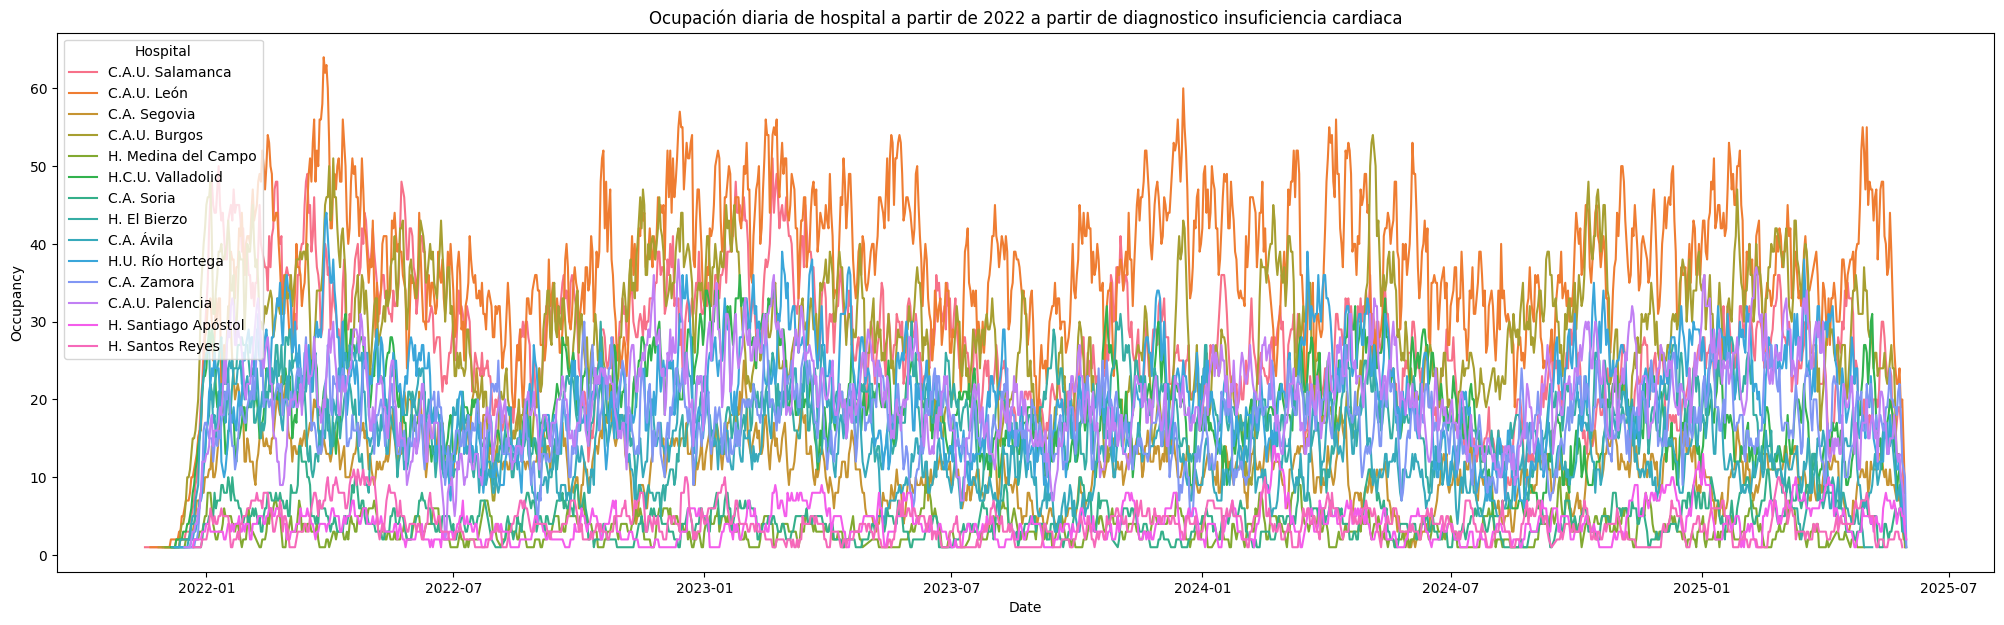

In [11]:
#_UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO INSUFICIENCIA CARDIACA AÑOS 2022, 2023, 2024 Y 2025

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2025.csv'

urls = [url, url1, url2, url3]

# Read and concatenate the CSV files from the URLs
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Display the first few rows of the combined dataframe
display(df.head())
display(df.info())
# CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('altas_hospitalarias_con_diagnostico_de_insuficiencia_cardiaca.csv', index=False)

# AGREGO UNA COLUMNA 'fecha_hosp_insuf_cardiaca' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_hosp_insuf_cardiaca'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)
# ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_hosp_insuf_cardiaca'] = pd.to_datetime(expanded_df['fecha_hosp_insuf_cardiaca'])

# PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

#TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria_insufcard = expanded_df.groupby(['fecha_hosp_insuf_cardiaca', 'Hospital']).size().reset_index(name='Occupancy')


plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria_insufcard, x='fecha_hosp_insuf_cardiaca', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico insuficiencia cardiaca')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria_insufcard.to_csv('Ocupación_total_diari_insuf_cardiaca.csv', index=False)


Fecha de ingreso        Fecha de alta  \
0  01/01/2022 02:01:00  06/01/2022 15:38:00   
1  01/01/2022 04:29:00  08/01/2022 13:00:00   
2  01/01/2022 04:31:00  04/01/2022 04:20:00   
3  01/01/2022 06:31:00  05/01/2022 16:29:00   
4  01/01/2022 11:32:00  18/01/2022 15:12:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
1                                   Sábado   
2                                   Sábado   
3                                   Sábado   
4                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                Jueves                  Z.B.S. Los Cubos   
1                                Sábado            Z.B.S. Eras de Renueva   
2                                Martes             Z.B.S. Venta de Baños   
3                             Miércoles                  Z.B.S. Alcañices   
4                                Martes          Z.B.S. Camarzana de Tera   

  Ámbito de procedencia          Hospital       Área  Provincia  Edad    Sexo  
0                Urbano     C.A.U. Burgos     Burgos     Burgos    64   Mujer  
1                Urbano       C.A.U. León       León       León    72  Hombre  
2                 Rural   C.A.U. Palencia   Palencia   Palencia    88   Mujer  
3                 Rural  C.A.U. Salamanca  Salamanca  Salamanca    70  Hombre  
4                 Rural  C.A.U. Salamanca  Salamanca  Salamanca    87  Hombre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12023 entries, 0 to 12022
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          12023 non-null  object
 1   Fecha de alta                             12023 non-null  object
 2   Día de la semana en la fecha del ingreso  12023 non-null  object
 3   Día de la semana en la fecha del alta     12023 non-null  object
 4   Zona Básica de Salud del Paciente         12020 non-null  object
 5   Ámbito de procedencia                     12020 non-null  object
 6   Hospital                                  12023 non-null  object
 7   Área                                      12023 non-null  object
 8   Provincia                                 12023 non-null  object
 9   Edad                                      12023 non-null  int64 
 10  Sexo                                      1202

None

Fecha de ingreso       Fecha de alta  \
0 2022-01-01 02:01:00 2022-01-06 15:38:00   
0 2022-01-01 02:01:00 2022-01-06 15:38:00   
0 2022-01-01 02:01:00 2022-01-06 15:38:00   
0 2022-01-01 02:01:00 2022-01-06 15:38:00   
0 2022-01-01 02:01:00 2022-01-06 15:38:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                Jueves                  Z.B.S. Los Cubos   
0                                Jueves                  Z.B.S. Los Cubos   
0                                Jueves                  Z.B.S. Los Cubos   
0                                Jueves                  Z.B.S. Los Cubos   
0                                Jueves                  Z.B.S. Los Cubos   

  Ámbito de procedencia       Hospital    Área Provincia  Edad   Sexo  \
0                Urbano  C.A.U. Burgos  Burgos    Burgos    64  Mujer   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    64  Mujer   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    64  Mujer   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    64  Mujer   
0                Urbano  C.A.U. Burgos  Burgos    Burgos    64  Mujer   

  fecha_infarto_miorcardio  
0               2022-01-01  
0               2022-01-02  
0               2022-01-03  
0               2022-01-04  
0               2022-01-05

Fecha de ingreso       Fecha de alta  \
12022 2024-12-31 23:05:00 2025-01-22 15:37:00   
12022 2024-12-31 23:05:00 2025-01-22 15:37:00   
12022 2024-12-31 23:05:00 2025-01-22 15:37:00   
12022 2024-12-31 23:05:00 2025-01-22 15:37:00   
12022 2024-12-31 23:05:00 2025-01-22 15:37:00   

      Día de la semana en la fecha del ingreso  \
12022                                   Martes   
12022                                   Martes   
12022                                   Martes   
12022                                   Martes   
12022                                   Martes   

      Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
12022                             Miércoles              Z.B.S. Segovia Rural   
12022                             Miércoles              Z.B.S. Segovia Rural   
12022                             Miércoles              Z.B.S. Segovia Rural   
12022                             Miércoles              Z.B.S. Segovia Rural   
12022                             Miércoles              Z.B.S. Segovia Rural   

      Ámbito de procedencia      Hospital     Área Provincia  Edad    Sexo  \
12022                 Rural  C.A. Segovia  Segovia   Segovia    77  Hombre   
12022                 Rural  C.A. Segovia  Segovia   Segovia    77  Hombre   
12022                 Rural  C.A. Segovia  Segovia   Segovia    77  Hombre   
12022                 Rural  C.A. Segovia  Segovia   Segovia    77  Hombre   
12022                 Rural  C.A. Segovia  Segovia   Segovia    77  Hombre   

      fecha_infarto_miorcardio  
12022               2025-01-18  
12022               2025-01-19  
12022               2025-01-20  
12022               2025-01-21  
12022               2025-01-22

<class 'pandas.core.frame.DataFrame'>
Index: 85901 entries, 0 to 12022
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Fecha de ingreso                          85901 non-null  datetime64[ns]
 1   Fecha de alta                             85901 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  85901 non-null  object        
 3   Día de la semana en la fecha del alta     85901 non-null  object        
 4   Zona Básica de Salud del Paciente         85891 non-null  object        
 5   Ámbito de procedencia                     85891 non-null  object        
 6   Hospital                                  85901 non-null  object        
 7   Área                                      85901 non-null  object        
 8   Provincia                                 85901 non-null  object        
 9   Edad                             

None

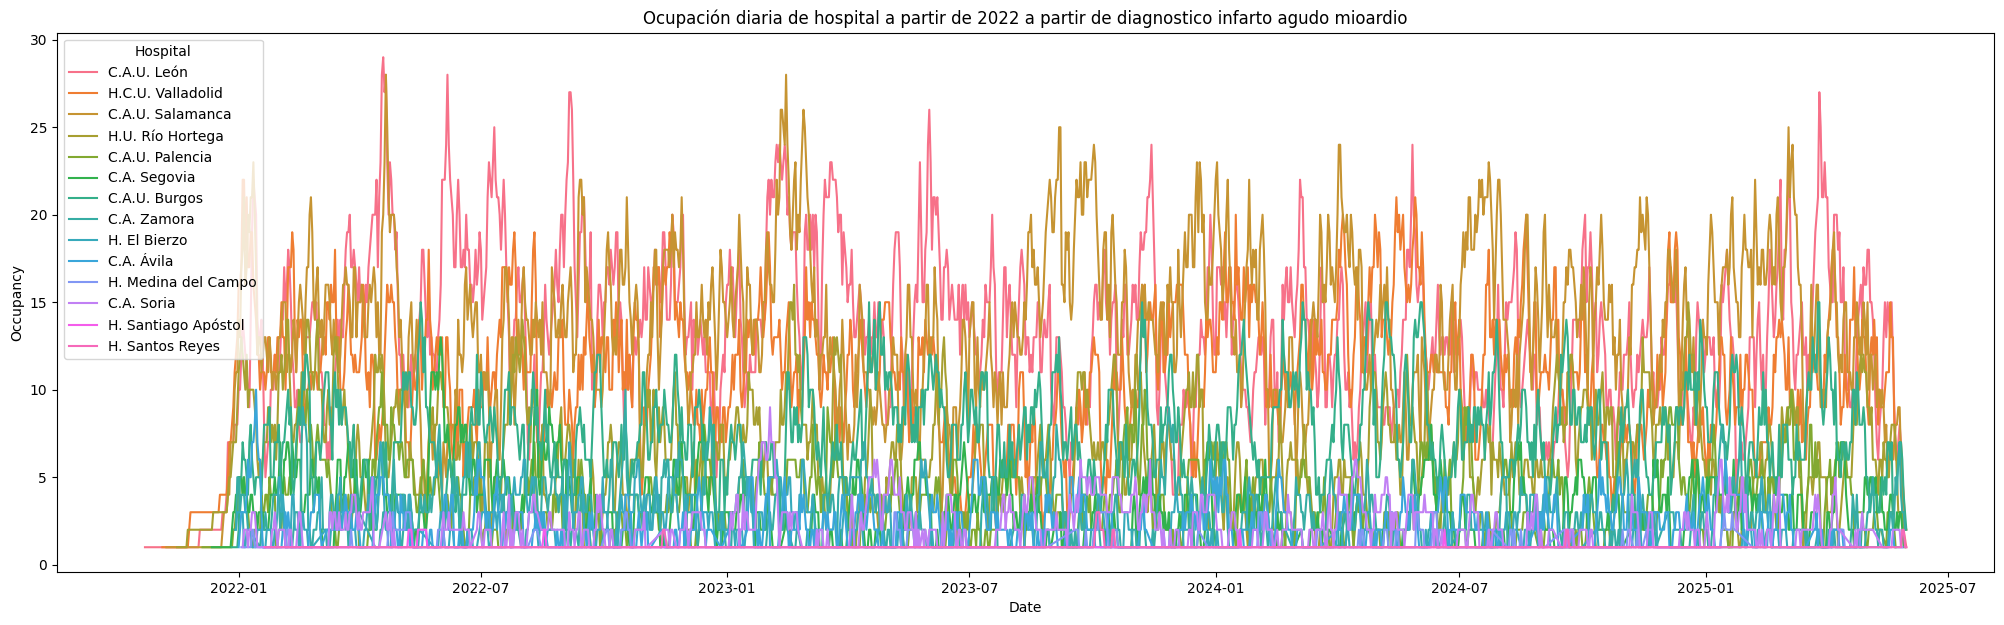

In [12]:
#UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO INFARTO AGUDO DE MIOCARDIO AÑOS 2022, 2023, 2024 Y 2025

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2025.csv'

urls = [url, url1, url2, url3]

# Leer y unir en un solo Dataframe los datos de los 4 URL
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Mostrar primeras filas e info del nuevo Dataframe
display(df.head())
display(df.info())

# CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('altas_hospitalarias_con_diagnostico_infarto_agudo_miorcardio.csv', index=False)

# AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_infarto_miorcardio'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

# ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_infarto_miorcardio'] = pd.to_datetime(expanded_df['fecha_infarto_miorcardio'])

# PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

#TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria_infarto = expanded_df.groupby(['fecha_infarto_miorcardio', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria_infarto.head()

#VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria_infarto, x='fecha_infarto_miorcardio', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico infarto agudo mioardio')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

#GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria_infarto.to_csv('Ocupación_total_diaria_hospitalaria_infarto_agudo_miorcardio.csv', index=False)

Fecha de ingreso        Fecha de alta  \
0  01/01/2022 00:45:00  10/01/2022 14:01:00   
1  01/01/2022 01:38:00  03/01/2022 20:32:00   
2  01/01/2022 13:44:00  10/01/2022 09:50:00   
3  01/01/2022 13:57:00  13/01/2022 14:12:00   
4  01/01/2022 14:42:00  08/01/2022 16:00:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
1                                   Sábado   
2                                   Sábado   
3                                   Sábado   
4                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                 Lunes                     Z.B.S. Bierzo   
1                                 Lunes                Z.B.S. La Victoria   
2                                 Lunes         Z.B.S. Plaza del Ejército   
3                                Jueves    Z.B.S. Medina del Campo Urbano   
4                                Sábado                  Z.B.S. Parquesol   

  Ámbito de procedencia           Hospital              Área   Provincia  \
0                Urbano       H. El Bierzo            Bierzo        León   
1                Urbano  H.C.U. Valladolid   Valladolid Este  Valladolid   
2                Urbano   H.U. Río Hortega  Valladolid Oeste  Valladolid   
3                Urbano  H.C.U. Valladolid   Valladolid Este  Valladolid   
4                Urbano  H.C.U. Valladolid   Valladolid Este  Valladolid   

   Edad    Sexo  
0    87   Mujer  
1    71  Hombre  
2    64   Mujer  
3    83   Mujer  
4    57   Mujer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17837 entries, 0 to 17836
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          17837 non-null  object
 1   Fecha de alta                             17837 non-null  object
 2   Día de la semana en la fecha del ingreso  17837 non-null  object
 3   Día de la semana en la fecha del alta     17837 non-null  object
 4   Zona Básica de Salud del Paciente         17832 non-null  object
 5   Ámbito de procedencia                     17832 non-null  object
 6   Hospital                                  17837 non-null  object
 7   Área                                      17837 non-null  object
 8   Provincia                                 17837 non-null  object
 9   Edad                                      17837 non-null  int64 
 10  Sexo                                      1783

None

Fecha de ingreso       Fecha de alta  \
0 2022-01-01 00:45:00 2022-01-10 14:01:00   
0 2022-01-01 00:45:00 2022-01-10 14:01:00   
0 2022-01-01 00:45:00 2022-01-10 14:01:00   
0 2022-01-01 00:45:00 2022-01-10 14:01:00   
0 2022-01-01 00:45:00 2022-01-10 14:01:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                 Lunes                     Z.B.S. Bierzo   
0                                 Lunes                     Z.B.S. Bierzo   
0                                 Lunes                     Z.B.S. Bierzo   
0                                 Lunes                     Z.B.S. Bierzo   
0                                 Lunes                     Z.B.S. Bierzo   

  Ámbito de procedencia      Hospital    Área Provincia  Edad   Sexo  \
0                Urbano  H. El Bierzo  Bierzo      León    87  Mujer   
0                Urbano  H. El Bierzo  Bierzo      León    87  Mujer   
0                Urbano  H. El Bierzo  Bierzo      León    87  Mujer   
0                Urbano  H. El Bierzo  Bierzo      León    87  Mujer   
0                Urbano  H. El Bierzo  Bierzo      León    87  Mujer   

  fecha_hosp_ictus  
0       2022-01-01  
0       2022-01-02  
0       2022-01-03  
0       2022-01-04  
0       2022-01-05

Fecha de ingreso       Fecha de alta  \
17836 2024-12-31 20:00:00 2025-01-09 14:00:00   
17836 2024-12-31 20:00:00 2025-01-09 14:00:00   
17836 2024-12-31 20:00:00 2025-01-09 14:00:00   
17836 2024-12-31 20:00:00 2025-01-09 14:00:00   
17836 2024-12-31 20:00:00 2025-01-09 14:00:00   

      Día de la semana en la fecha del ingreso  \
17836                                   Martes   
17836                                   Martes   
17836                                   Martes   
17836                                   Martes   
17836                                   Martes   

      Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
17836                                Jueves                   Z.B.S. Bembibre   
17836                                Jueves                   Z.B.S. Bembibre   
17836                                Jueves                   Z.B.S. Bembibre   
17836                                Jueves                   Z.B.S. Bembibre   
17836                                Jueves                   Z.B.S. Bembibre   

      Ámbito de procedencia      Hospital    Área Provincia  Edad   Sexo  \
17836                 Rural  H. El Bierzo  Bierzo      León    85  Mujer   
17836                 Rural  H. El Bierzo  Bierzo      León    85  Mujer   
17836                 Rural  H. El Bierzo  Bierzo      León    85  Mujer   
17836                 Rural  H. El Bierzo  Bierzo      León    85  Mujer   
17836                 Rural  H. El Bierzo  Bierzo      León    85  Mujer   

      fecha_hosp_ictus  
17836       2025-01-05  
17836       2025-01-06  
17836       2025-01-07  
17836       2025-01-08  
17836       2025-01-09

<class 'pandas.core.frame.DataFrame'>
Index: 163068 entries, 0 to 17836
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Fecha de ingreso                          163068 non-null  datetime64[ns]
 1   Fecha de alta                             163068 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  163068 non-null  object        
 3   Día de la semana en la fecha del alta     163068 non-null  object        
 4   Zona Básica de Salud del Paciente         163032 non-null  object        
 5   Ámbito de procedencia                     163032 non-null  object        
 6   Hospital                                  163068 non-null  object        
 7   Área                                      163068 non-null  object        
 8   Provincia                                 163068 non-null  object        
 9   Edad                 

None

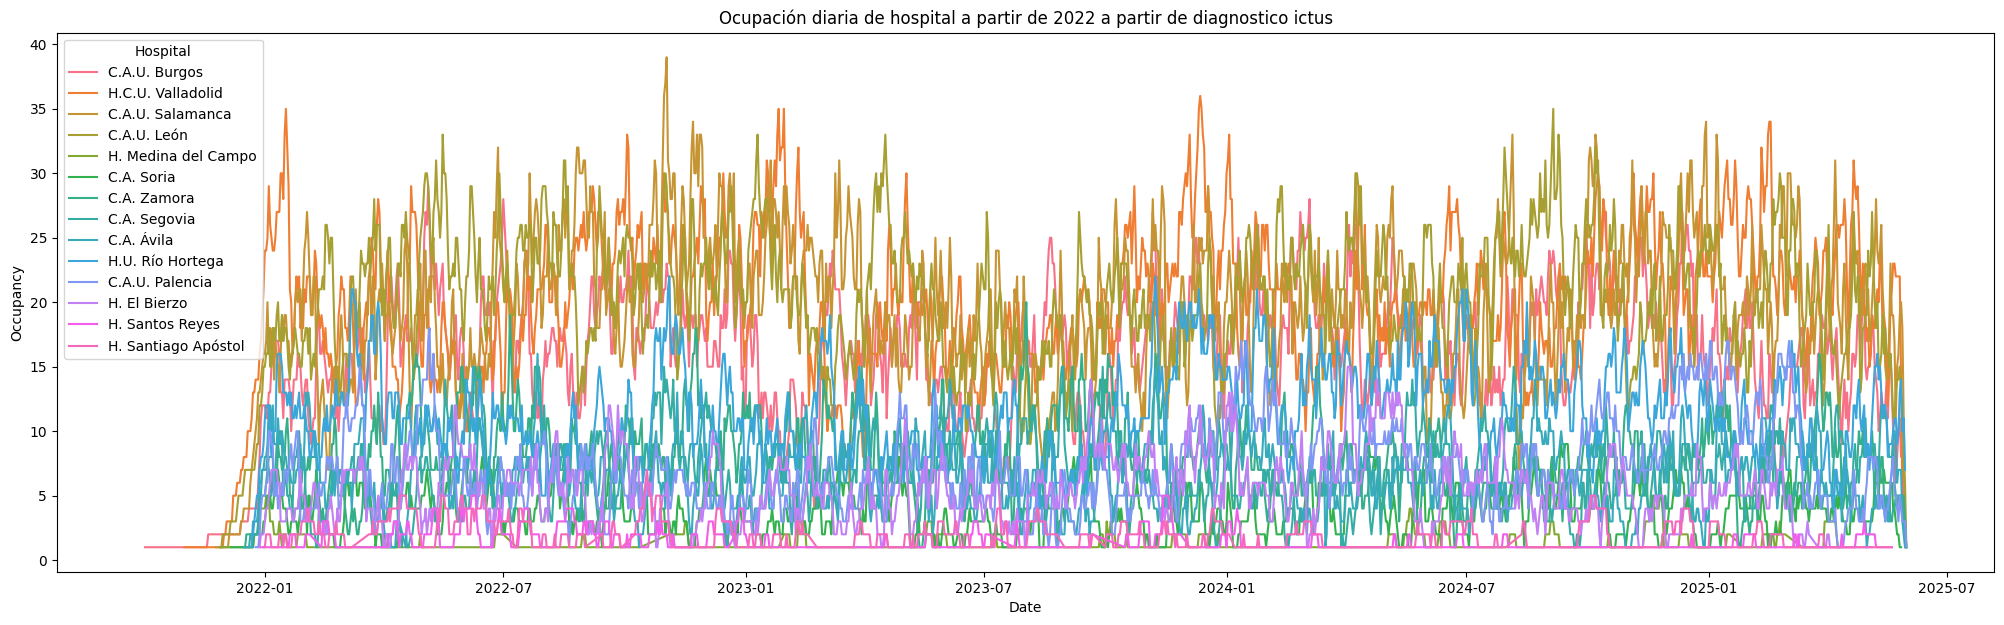

In [13]:
#UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO FRACTURA DE CADERA AÑOS 2022, 2023, 2024 Y 2025
import pandas as pd

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2025.csv'

urls = [url, url1, url2, url3]

#Leo y concateno los datos de los 4 URLS
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Chequear info del nuevo DataFrame
display(df.head())
display(df.info())

# 3_CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('4_altas_hospitalarias_ictus.csv', index=False)

# 4_AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_hosp_ictus'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

# ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_hosp_ictus'] = pd.to_datetime(expanded_df['fecha_hosp_ictus'])

# PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

# TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria_ictus = expanded_df.groupby(['fecha_hosp_ictus', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria_ictus.head()

#VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria_ictus, x='fecha_hosp_ictus', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico ictus')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

#GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria_ictus.to_csv('4_Ocupación_total_diaria_hosp_ictus.csv', index=False)

Fecha de ingreso        Fecha de alta  \
0  01/01/2022 00:18:00  10/01/2022 18:20:00   
1  01/01/2022 02:09:00  24/01/2022 15:10:00   
2  01/01/2022 02:35:00  07/01/2022 18:01:00   
3  01/01/2022 09:40:00  11/01/2022 09:07:00   
4  01/01/2022 13:01:00  07/01/2022 15:29:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
1                                   Sábado   
2                                   Sábado   
3                                   Sábado   
4                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                 Lunes             Z.B.S. Ciudad Rodrigo   
1                                 Lunes             Z.B.S. Ávila Estación   
2                               Viernes                  Z.B.S. Cistierna   
3                                Martes                 Z.B.S. Alamedilla   
4                               Viernes         Z.B.S. Plaza del Ejército   

  Ámbito de procedencia          Hospital              Área   Provincia  Edad  \
0                Urbano  C.A.U. Salamanca         Salamanca   Salamanca    87   
1                Urbano        C.A. Ávila             Ávila       Ávila    77   
2                 Rural       C.A.U. León              León        León    63   
3                Urbano  C.A.U. Salamanca         Salamanca   Salamanca    69   
4                Urbano  H.U. Río Hortega  Valladolid Oeste  Valladolid    72   

     Sexo  
0   Mujer  
1  Hombre  
2  Hombre  
3  Hombre  
4  Hombre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20795 entries, 0 to 20794
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          20795 non-null  object
 1   Fecha de alta                             20795 non-null  object
 2   Día de la semana en la fecha del ingreso  20795 non-null  object
 3   Día de la semana en la fecha del alta     20795 non-null  object
 4   Zona Básica de Salud del Paciente         20789 non-null  object
 5   Ámbito de procedencia                     20789 non-null  object
 6   Hospital                                  20795 non-null  object
 7   Área                                      20795 non-null  object
 8   Provincia                                 20795 non-null  object
 9   Edad                                      20795 non-null  int64 
 10  Sexo                                      2079

None

Fecha de ingreso       Fecha de alta  \
0 2022-01-01 00:18:00 2022-01-10 18:20:00   
0 2022-01-01 00:18:00 2022-01-10 18:20:00   
0 2022-01-01 00:18:00 2022-01-10 18:20:00   
0 2022-01-01 00:18:00 2022-01-10 18:20:00   
0 2022-01-01 00:18:00 2022-01-10 18:20:00   

  Día de la semana en la fecha del ingreso  \
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   
0                                   Sábado   

  Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
0                                 Lunes             Z.B.S. Ciudad Rodrigo   
0                                 Lunes             Z.B.S. Ciudad Rodrigo   
0                                 Lunes             Z.B.S. Ciudad Rodrigo   
0                                 Lunes             Z.B.S. Ciudad Rodrigo   
0                                 Lunes             Z.B.S. Ciudad Rodrigo   

  Ámbito de procedencia          Hospital       Área  Provincia  Edad   Sexo  \
0                Urbano  C.A.U. Salamanca  Salamanca  Salamanca    87  Mujer   
0                Urbano  C.A.U. Salamanca  Salamanca  Salamanca    87  Mujer   
0                Urbano  C.A.U. Salamanca  Salamanca  Salamanca    87  Mujer   
0                Urbano  C.A.U. Salamanca  Salamanca  Salamanca    87  Mujer   
0                Urbano  C.A.U. Salamanca  Salamanca  Salamanca    87  Mujer   

  fecha_hosp_epoc  
0      2022-01-01  
0      2022-01-02  
0      2022-01-03  
0      2022-01-04  
0      2022-01-05

Fecha de ingreso       Fecha de alta  \
20794 2024-12-31 22:39:00 2025-01-09 15:29:00   
20794 2024-12-31 22:39:00 2025-01-09 15:29:00   
20794 2024-12-31 22:39:00 2025-01-09 15:29:00   
20794 2024-12-31 22:39:00 2025-01-09 15:29:00   
20794 2024-12-31 22:39:00 2025-01-09 15:29:00   

      Día de la semana en la fecha del ingreso  \
20794                                   Martes   
20794                                   Martes   
20794                                   Martes   
20794                                   Martes   
20794                                   Martes   

      Día de la semana en la fecha del alta Zona Básica de Salud del Paciente  \
20794                                Jueves                 Z.B.S. Segovia II   
20794                                Jueves                 Z.B.S. Segovia II   
20794                                Jueves                 Z.B.S. Segovia II   
20794                                Jueves                 Z.B.S. Segovia II   
20794                                Jueves                 Z.B.S. Segovia II   

      Ámbito de procedencia      Hospital     Área Provincia  Edad    Sexo  \
20794                Urbano  C.A. Segovia  Segovia   Segovia    82  Hombre   
20794                Urbano  C.A. Segovia  Segovia   Segovia    82  Hombre   
20794                Urbano  C.A. Segovia  Segovia   Segovia    82  Hombre   
20794                Urbano  C.A. Segovia  Segovia   Segovia    82  Hombre   
20794                Urbano  C.A. Segovia  Segovia   Segovia    82  Hombre   

      fecha_hosp_epoc  
20794      2025-01-05  
20794      2025-01-06  
20794      2025-01-07  
20794      2025-01-08  
20794      2025-01-09

<class 'pandas.core.frame.DataFrame'>
Index: 189525 entries, 0 to 20794
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Fecha de ingreso                          189525 non-null  datetime64[ns]
 1   Fecha de alta                             189525 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  189525 non-null  object        
 3   Día de la semana en la fecha del alta     189525 non-null  object        
 4   Zona Básica de Salud del Paciente         189485 non-null  object        
 5   Ámbito de procedencia                     189485 non-null  object        
 6   Hospital                                  189525 non-null  object        
 7   Área                                      189525 non-null  object        
 8   Provincia                                 189525 non-null  object        
 9   Edad                 

None

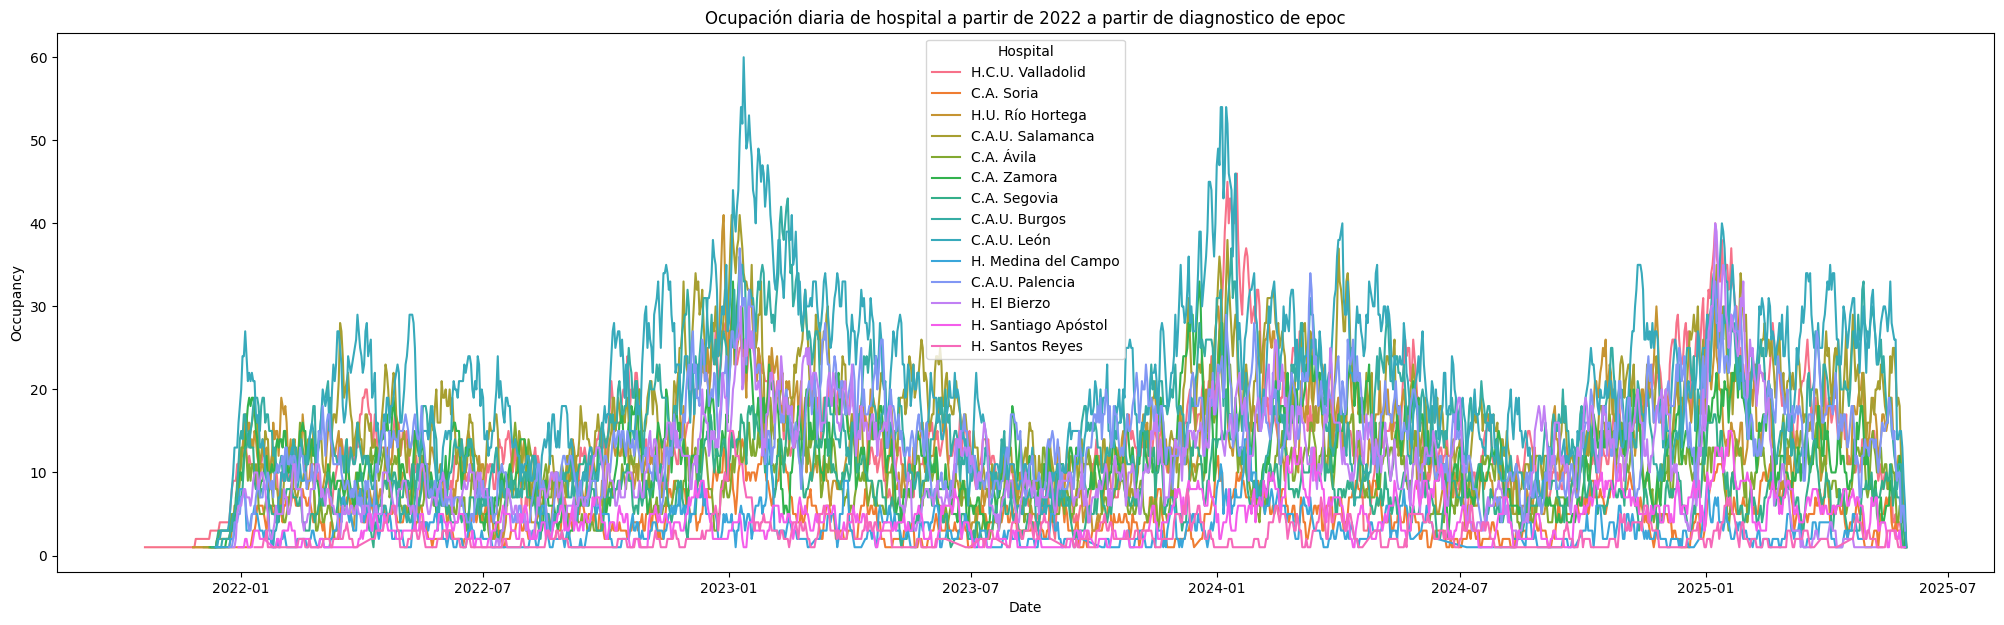

In [14]:
#UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO EPOC AÑOS 2022, 2023, 2024 Y 2025

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2025.csv'

urls = [url, url1, url2, url3]

# Read and concatenate the CSV files from the URLs
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Display the first few rows of the combined dataframe
display(df.head())
display(df.info())

# CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('5_altas_hospitalarias_con_diagnostico_de_EPOC.csv', index=False)

# AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_hosp_epoc'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

# ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_hosp_epoc'] = pd.to_datetime(expanded_df['fecha_hosp_epoc'])

# PARA CHEQUEAR INFO NUEVAepoc
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

#TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria_epoc = expanded_df.groupby(['fecha_hosp_epoc', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria_epoc.head()

#VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL


plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria_epoc, x='fecha_hosp_epoc', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico de epoc')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

#GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
#Ocupación_total_diaria_epoc.to_csv('5_Ocupación_total_diaria_hosp_epoc.csv', index=False)

In [15]:
df1= Ocupación_total_diaria_epoc.copy()
df2= Ocupación_total_diaria_insufcard.copy()
df3=Ocupación_total_diaria_infarto.copy()
df4=Ocupación_total_diaria_ictus.copy()
df5=Ocupación_total_diaria_epoc.copy()

In [16]:
df1 = df1.rename(columns={'Occupancy': 'Hosp_fract_cadera'})
display(df1.head())
df2 = df2.rename(columns={'Occupancy': 'Hosp_insuf_card'})
df3 = df3.rename(columns={'Occupancy': 'Hosp_infarto_miorardio'})
df4 = df4.rename(columns={'Occupancy': 'Hosp_ictus'})
df5 = df5.rename(columns={'Occupancy': 'Hosp_epoc'})

date_col_mapping = {
    'fecha_hosp_cad': 'Date',
    'fecha_hosp_insuf_cardiaca': 'Date',
    'fecha_infarto_miorcardio': 'Date',
    'fecha_hosp_ictus': 'Date',
    'fecha_hosp_epoc': 'Date'
}

df1 = df1.rename(columns=date_col_mapping)
df2 = df2.rename(columns=date_col_mapping)
df3 = df3.rename(columns=date_col_mapping)
df4 = df4.rename(columns=date_col_mapping)
df5 = df5.rename(columns=date_col_mapping)

merged_df = pd.merge(df1, df2, on=['Date', 'Hospital'], how='outer')
merged_df = pd.merge(merged_df, df3, on=['Date', 'Hospital'], how='outer')
merged_df = pd.merge(merged_df, df4, on=['Date', 'Hospital'], how='outer')
merged_df = pd.merge(merged_df, df5, on=['Date', 'Hospital'], how='outer')

merged_df = merged_df.fillna(0)

display(merged_df.tail(20))
merged_df.to_csv('ocupaciones varias en hospital.csv', index=False)

fecha_hosp_epoc           Hospital  Hosp_fract_cadera
0      2021-10-21  H.C.U. Valladolid                  1
1      2021-10-22  H.C.U. Valladolid                  1
2      2021-10-23  H.C.U. Valladolid                  1
3      2021-10-24  H.C.U. Valladolid                  1
4      2021-10-25  H.C.U. Valladolid                  1

Date             Hospital  Hosp_fract_cadera  Hosp_insuf_card  \
17941 2025-05-30           C.A. Ávila                4.0              0.0   
17942 2025-05-30        C.A.U. Burgos                3.0              1.0   
17943 2025-05-30          C.A.U. León                6.0              8.0   
17944 2025-05-30      C.A.U. Palencia                3.0              4.0   
17945 2025-05-30     C.A.U. Salamanca                2.0              5.0   
17946 2025-05-30  H. Santiago Apóstol                1.0              3.0   
17947 2025-05-30      H. Santos Reyes                0.0              0.0   
17948 2025-05-30    H.C.U. Valladolid                0.0              3.0   
17949 2025-05-30     H.U. Río Hortega                4.0              0.0   
17950 2025-05-31         C.A. Segovia                1.0              0.0   
17951 2025-05-31           C.A. Soria                0.0              1.0   
17952 2025-05-31          C.A. Zamora                0.0              1.0   
17953 2025-05-31           C.A. Ávila                1.0              0.0   
17954 2025-05-31        C.A.U. Burgos                1.0              0.0   
17955 2025-05-31          C.A.U. León                1.0              0.0   
17956 2025-05-31      C.A.U. Palencia                0.0              0.0   
17957 2025-05-31  H. Santiago Apóstol                0.0              2.0   
17958 2025-05-31      H. Santos Reyes                0.0              0.0   
17959 2025-05-31    H.C.U. Valladolid                0.0              0.0   
17960 2025-05-31     H.U. Río Hortega                1.0              0.0   

       Hosp_infarto_miorardio  Hosp_ictus  Hosp_epoc  
17941                     0.0         1.0        4.0  
17942                     3.0         3.0        3.0  
17943                     0.0         6.0        6.0  
17944                     0.0         3.0        3.0  
17945                     2.0         5.0        2.0  
17946                     0.0         0.0        1.0  
17947                     1.0         0.0        0.0  
17948                     2.0         3.0        0.0  
17949                     2.0         7.0        4.0  
17950                     0.0         1.0        1.0  
17951                     0.0         0.0        0.0  
17952                     0.0         1.0        0.0  
17953                     0.0         0.0        1.0  
17954                     2.0         0.0        1.0  
17955                     1.0         1.0        1.0  
17956                     0.0         1.0        0.0  
17957                     0.0         0.0        0.0  
17958                     1.0         0.0        0.0  
17959                     2.0         1.0        0.0  
17960                     0.0         0.0        1.0

In [17]:
# 1. Cargar los archivos
df11 = merged_df.copy()
url = 'https://datosabiertos.jcyl.es/web/jcyl/risp/es/salud/ocupacion-hospitales/1284947951914.csv'
df22 = pd.read_csv(url, sep=";", encoding='utf-8', on_bad_lines='skip')


# 2. Estandarizar nombres de columnas
df11.columns = df11.columns.str.lower()
df22.columns = df22.columns.str.lower()

# 3. Convertir las fechas al mismo formato
df11['date'] = pd.to_datetime(df11['date'])
df22['fecha'] = pd.to_datetime(df22['fecha'], dayfirst=True, format='mixed')

# 4. Renombrar hospitales para que coincidan
mapa_hospitales = {
    'C.A.U. Burgos': 'Complejo Asistencial Universitario de Burgos',
    'C.A.U. León': 'Complejo Asistencial Universitario de León',
    'C.A.U. Palencia': 'Complejo Asistencial Universitario de Palencia',
    'C.A.U. Salamanca': 'Complejo Asistencial Universitario de Salamanca',
    'C.A. Segovia': 'Complejo Asistencial de Segovia',
    'C.A. Soria': 'Complejo Asistencial de Soria',
    'C.A. Zamora': 'Complejo Asistencial de Zamora',
    'C.A. Ávila': 'Complejo Asistencial de Ávila',
    'H. El Bierzo': 'Hospital El Bierzo',
    'H. Medina del Campo': 'Hospital Medina del Campo',
    'H. Santiago Apóstol': 'Hospital Santiago Apóstol',
    'H. Santos Reyes': 'Hospital Santos Reyes',
    'H.C.U. Valladolid': 'Hospital Clínico Universitario de Valladolid',
    'H.U. Río Hortega': 'Hospital Universitario Río Hortega'
}

df11['hospital'] = df11['hospital'].replace(mapa_hospitales)

In [18]:
df22.head()

fecha                                      hospital   provincia  \
0 2020-04-07                     Hospital Santiago Apóstol      Burgos   
1 2020-04-07    Complejo Asistencial Universitario de León        León   
2 2020-04-07  Hospital Clínico Universitario de Valladolid  Valladolid   
3 2020-04-07            Hospital Universitario Río Hortega  Valladolid   
4 2020-04-08  Complejo Asistencial Universitario de Burgos      Burgos   

   camas_iniciales_planta  camas_habilitadas_planta  camas_ocupadas_planta  \
0                    94.0                     135.0                   51.0   
1                   752.0                     818.0                  462.0   
2                   538.0                     646.0                  468.0   
3                   470.0                     652.0                  332.0   
4                   580.0                     685.0                  369.0   

   camas_iniciales_uci  camas_habilitadas_uci  camas_ocupadas_uci  \
0                  0.0                    0.0                 0.0   
1                 28.0                   59.0                46.0   
2                 44.0                   83.0                59.0   
3                 19.0                   61.0                52.0   
4                 24.0                   76.0                62.0   

   camas_ocupadas_covid_uci  codigo_ine  
0                       NaN        9059  
1                       NaN       24089  
2                       NaN       47186  
3                       NaN       47186  
4                       NaN        9059

In [19]:


# 5. Reno1mbrar columnas para que coincidan
df11 = df11.rename(columns={'date': 'fecha'})
# ya ambas tienen: fecha, hospital

# 6. Unir los datasets
df_merged = pd.merge(df11, df22, on=['fecha', 'hospital'], how='inner')

# 7. Mostrar resultado
print("Filas combinadas:", len(df_merged))
df_merged.info()

Filas combinadas: 16283
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   fecha                     16283 non-null  datetime64[ns]
 1   hospital                  16283 non-null  object        
 2   hosp_fract_cadera         16283 non-null  float64       
 3   hosp_insuf_card           16283 non-null  float64       
 4   hosp_infarto_miorardio    16283 non-null  float64       
 5   hosp_ictus                16283 non-null  float64       
 6   hosp_epoc                 16283 non-null  float64       
 7   provincia                 16283 non-null  object        
 8   camas_iniciales_planta    16283 non-null  float64       
 9   camas_habilitadas_planta  16283 non-null  float64       
 10  camas_ocupadas_planta     16283 non-null  float64       
 11  camas_iniciales_uci       16283 non-null  float64       

In [20]:
import requests
import pandas as pd
from datetime import datetime, timedelta

API_KEY = "72c6cd939a3d48aeaee113650251410"

provincias = ['Burgos', 'Palencia', 'Valladolid', 'Ávila', 'León',
              'Salamanca', 'Soria', 'Segovia', 'Zamora']

start_date = datetime(2022, 1, 1)
end_date = datetime(2025, 10, 25)

url_base = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
data_all = []

# Función para obtener datos de una provincia en un rango corto
def get_weather(provincia, start, end):
    params = {
        "key": API_KEY,
        "q": f"{provincia}, Spain",
        "format": "json",
        "date": start.strftime("%Y-%m-%d"),
        "enddate": end.strftime("%Y-%m-%d"),
        "tp": "24"
    }

    response = requests.get(url_base, params=params)
    if response.status_code == 200:
        data = response.json()
        if 'data' in data and 'weather' in data['data']:
            for day in data['data']['weather']:
                data_all.append({
                    "provincia": provincia,
                    "fecha": day['date'],
                    "tmax": day['maxtempC'],
                    "tmin": day['mintempC'],
                    "precip_mm": day['hourly'][0]['precipMM'],
                    "humedad_%": day['hourly'][0]['humidity'],
                    "viento_kph": day['hourly'][0]['windspeedKmph']
                })
    else:
        print(f"Error en {provincia}: {response.status_code}")

# Bucle por provincias y meses
for prov in provincias:
    current = start_date
    while current < end_date:
        next_date = current + timedelta(days=30)
        if next_date > end_date:
            next_date = end_date
        print(f"Descargando {prov} desde {current.date()} hasta {next_date.date()}...")
        get_weather(prov, current, next_date)
        current = next_date + timedelta(days=1)



Descargando Burgos desde 2022-01-01 hasta 2022-01-31...
Descargando Burgos desde 2022-02-01 hasta 2022-03-03...
Descargando Burgos desde 2022-03-04 hasta 2022-04-03...
Descargando Burgos desde 2022-04-04 hasta 2022-05-04...
Descargando Burgos desde 2022-05-05 hasta 2022-06-04...
Descargando Burgos desde 2022-06-05 hasta 2022-07-05...
Descargando Burgos desde 2022-07-06 hasta 2022-08-05...
Descargando Burgos desde 2022-08-06 hasta 2022-09-05...
Descargando Burgos desde 2022-09-06 hasta 2022-10-06...
Descargando Burgos desde 2022-10-07 hasta 2022-11-06...
Descargando Burgos desde 2022-11-07 hasta 2022-12-07...
Descargando Burgos desde 2022-12-08 hasta 2023-01-07...
Descargando Burgos desde 2023-01-08 hasta 2023-02-07...
Descargando Burgos desde 2023-02-08 hasta 2023-03-10...
Descargando Burgos desde 2023-03-11 hasta 2023-04-10...
Descargando Burgos desde 2023-04-11 hasta 2023-05-11...
Descargando Burgos desde 2023-05-12 hasta 2023-06-11...
Descargando Burgos desde 2023-06-12 hasta 2023-0

In [21]:
df_clima = pd.DataFrame(data_all)

In [22]:
df_clima.columns

Index(['provincia', 'fecha', 'tmax', 'tmin', 'precip_mm', 'humedad_%',
       'viento_kph'],
      dtype='object')

In [23]:
# Crear DataFrame

df_clima['fecha'] = pd.to_datetime(df_clima['fecha'])

# Guardar a CSV
df_clima.to_csv("clima_castilla_y_leon_2022_2025.csv", index=False)

print("✅ Descarga completada. Archivo guardado como clima_castilla_y_leon_2022_2025.csv")

✅ Descarga completada. Archivo guardado como clima_castilla_y_leon_2022_2025.csv


In [25]:
merged_df_final = pd.merge(df_merged, df_clima, on=['fecha', 'provincia'], how='left')
display(merged_df_final.head())
merged_df_final.to_csv('camas_hosp_clima.csv', index=False)

fecha                                      hospital  hosp_fract_cadera  \
0 2021-10-02  Complejo Asistencial Universitario de Burgos                0.0   
1 2021-10-03  Complejo Asistencial Universitario de Burgos                0.0   
2 2021-10-04  Complejo Asistencial Universitario de Burgos                0.0   
3 2021-10-05  Complejo Asistencial Universitario de Burgos                0.0   
4 2021-10-06  Complejo Asistencial Universitario de Burgos                0.0   

   hosp_insuf_card  hosp_infarto_miorardio  hosp_ictus  hosp_epoc provincia  \
0              0.0                     0.0         1.0        0.0    Burgos   
1              0.0                     0.0         1.0        0.0    Burgos   
2              0.0                     0.0         1.0        0.0    Burgos   
3              0.0                     0.0         1.0        0.0    Burgos   
4              0.0                     0.0         1.0        0.0    Burgos   

   camas_iniciales_planta  camas_habilitadas_planta  ...  camas_iniciales_uci  \
0                   842.0                     754.0  ...                 42.0   
1                   842.0                     755.0  ...                 42.0   
2                   842.0                     753.0  ...                 42.0   
3                   842.0                     754.0  ...                 42.0   
4                   842.0                     752.0  ...                 42.0   

   camas_habilitadas_uci  camas_ocupadas_uci  camas_ocupadas_covid_uci  \
0                   45.0                33.0                       3.0   
1                   45.0                33.0                       3.0   
2                   45.0                35.0                       3.0   
3                   45.0                36.0                       3.0   
4                   45.0                35.0                       3.0   

   codigo_ine  tmax tmin precip_mm humedad_% viento_kph  
0        9059   NaN  NaN       NaN       NaN        NaN  
1        9059   NaN  NaN       NaN       NaN        NaN  
2        9059   NaN  NaN       NaN       NaN        NaN  
3        9059   NaN  NaN       NaN       NaN        NaN  
4        9059   NaN  NaN       NaN       NaN        NaN  

[5 rows x 21 columns]

In [26]:
merged_df_final['fecha'] = pd.to_datetime(merged_df_final['fecha'])

filtered_merged_df_final = merged_df_final[merged_df_final['fecha'] >= '2022-01-01'].copy()

# Convert columns to float, coercing errors
cols_to_convert = ['tmax', 'tmin', 'precip_mm', 'humedad_%', 'viento_kph']
for col in cols_to_convert:
    filtered_merged_df_final[col] = pd.to_numeric(filtered_merged_df_final[col], errors='coerce')


display(filtered_merged_df_final.head())
filtered_merged_df_final.info()

filtered_merged_df_final.to_csv('camas_hosp_clima.csv', index=False)

fecha                                      hospital  \
522 2022-01-01               Complejo Asistencial de Segovia   
523 2022-01-01                 Complejo Asistencial de Soria   
524 2022-01-01                Complejo Asistencial de Zamora   
525 2022-01-01                 Complejo Asistencial de Ávila   
526 2022-01-01  Complejo Asistencial Universitario de Burgos   

     hosp_fract_cadera  hosp_insuf_card  hosp_infarto_miorardio  hosp_ictus  \
522                7.0             10.0                     5.0         7.0   
523                1.0              4.0                     0.0         3.0   
524               10.0             17.0                     5.0         5.0   
525               13.0             26.0                     1.0         8.0   
526               15.0             45.0                     2.0        12.0   

     hosp_epoc provincia  camas_iniciales_planta  camas_habilitadas_planta  \
522        7.0   Segovia                   365.0                     325.0   
523        1.0     Soria                   319.0                     274.0   
524       10.0    Zamora                   395.0                     358.0   
525       13.0     Ávila                   422.0                     368.0   
526       15.0    Burgos                   842.0                     755.0   

     ...  camas_iniciales_uci  camas_habilitadas_uci  camas_ocupadas_uci  \
522  ...                 16.0                   31.0                12.0   
523  ...                 14.0                   14.0                 9.0   
524  ...                 17.0                   19.0                 8.0   
525  ...                 14.0                   18.0                 9.0   
526  ...                 42.0                   47.0                38.0   

     camas_ocupadas_covid_uci  codigo_ine  tmax  tmin  precip_mm  humedad_%  \
522                       5.0       40004  17.0   8.0        0.0       41.0   
523                       5.0       42173  15.0   2.0        0.0       52.0   
524                       4.0       49275  16.0   4.0        0.0       59.0   
525                       4.0        5019  20.0   5.0        0.0       49.0   
526                      13.0        9059  15.0   4.0        0.0       54.0   

     viento_kph  
522         6.0  
523         6.0  
524         7.0  
525         8.0  
526        11.0  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 15761 entries, 522 to 16282
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   fecha                     15761 non-null  datetime64[ns]
 1   hospital                  15761 non-null  object        
 2   hosp_fract_cadera         15761 non-null  float64       
 3   hosp_insuf_card           15761 non-null  float64       
 4   hosp_infarto_miorardio    15761 non-null  float64       
 5   hosp_ictus                15761 non-null  float64       
 6   hosp_epoc                 15761 non-null  float64       
 7   provincia                 15761 non-null  object        
 8   camas_iniciales_planta    15761 non-null  float64       
 9   camas_habilitadas_planta  15761 non-null  float64       
 10  camas_ocupadas_planta     15761 non-null  float64       
 11  camas_iniciales_uci       15761 non-null  float64       
 12  camas_habilitadas_uci

In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Columna a codificar
cols_to_encode = ['hospital', 'provincia']

# Crear instancia OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar y transformar la columna seleccionada
encoded_cols = encoder.fit_transform(filtered_merged_df_final[cols_to_encode])

# Crear el dataframe
encoded_col_names = encoder.get_feature_names_out(cols_to_encode)
encoded_df_part = pd.DataFrame(encoded_cols, columns=encoded_col_names, index=filtered_merged_df_final.index)

# Elimniar las columnas originales
encoded_df = filtered_merged_df_final.drop(columns=cols_to_encode).copy()
encoded_df = pd.concat([encoded_df, encoded_df_part], axis=1)

display(encoded_df.head())
encoded_df.info()

fecha  hosp_fract_cadera  hosp_insuf_card  hosp_infarto_miorardio  \
522 2022-01-01                7.0             10.0                     5.0   
523 2022-01-01                1.0              4.0                     0.0   
524 2022-01-01               10.0             17.0                     5.0   
525 2022-01-01               13.0             26.0                     1.0   
526 2022-01-01               15.0             45.0                     2.0   

     hosp_ictus  hosp_epoc  camas_iniciales_planta  camas_habilitadas_planta  \
522         7.0        7.0                   365.0                     325.0   
523         3.0        1.0                   319.0                     274.0   
524         5.0       10.0                   395.0                     358.0   
525         8.0       13.0                   422.0                     368.0   
526        12.0       15.0                   842.0                     755.0   

     camas_ocupadas_planta  camas_iniciales_uci  ...  \
522                  167.0                 16.0  ...   
523                  131.0                 14.0  ...   
524                  265.0                 17.0  ...   
525                  196.0                 14.0  ...   
526                  457.0                 42.0  ...   

     hospital_Hospital Universitario Río Hortega  provincia_Burgos  \
522                                          0.0               0.0   
523                                          0.0               0.0   
524                                          0.0               0.0   
525                                          0.0               0.0   
526                                          0.0               1.0   

     provincia_León  provincia_Palencia  provincia_Salamanca  \
522             0.0                 0.0                  0.0   
523             0.0                 0.0                  0.0   
524             0.0                 0.0                  0.0   
525             0.0                 0.0                  0.0   
526             0.0                 0.0                  0.0   

     provincia_Segovia  provincia_Soria  provincia_Valladolid  \
522                1.0              0.0                   0.0   
523                0.0              1.0                   0.0   
524                0.0              0.0                   0.0   
525                0.0              0.0                   0.0   
526                0.0              0.0                   0.0   

     provincia_Zamora  provincia_Ávila  
522               0.0              0.0  
523               0.0              0.0  
524               1.0              0.0  
525               0.0              1.0  
526               0.0              0.0  

[5 rows x 41 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 15761 entries, 522 to 16282
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   fecha                                                     15761 non-null  datetime64[ns]
 1   hosp_fract_cadera                                         15761 non-null  float64       
 2   hosp_insuf_card                                           15761 non-null  float64       
 3   hosp_infarto_miorardio                                    15761 non-null  float64       
 4   hosp_ictus                                                15761 non-null  float64       
 5   hosp_epoc                                                 15761 non-null  float64       
 6   camas_iniciales_planta                                    15761 non-null  float64       
 7   camas_habilitadas_planta                   